# Hierarchical Clustering with Python


Import required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

Define Small sample of Data

In [3]:
X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])

Make representation of data points using Scatterplot


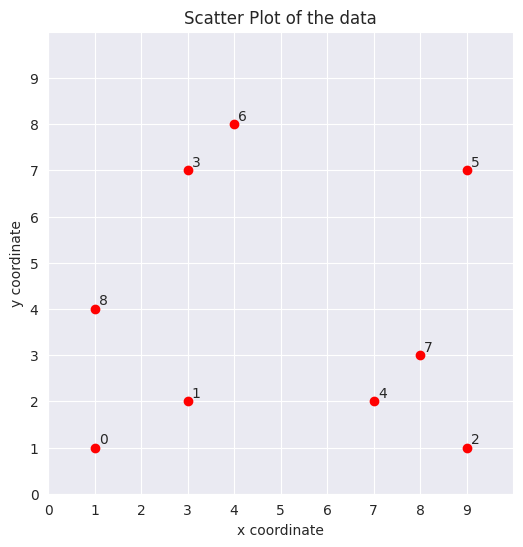

In [4]:
plt.figure(figsize=(6, 6))

plt.scatter(X1[:,0], X1[:,1], c='r')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i), xy=(X1[i,0], X1[i,1]), xytext=(3, 3), textcoords='offset points')

plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()

plt.show()

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

The linkage function has several methods available for calculating the distance between clusters: single, average, weighted, centroid, median, and ward. We will compare these methods

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X1, method='single', metric='euclidean')
Z2 = linkage(X1, method='complete', metric='euclidean')
Z3 = linkage(X1, method='average', metric='euclidean')
Z4 = linkage(X1, method='ward', metric='euclidean')

Draw dendrogram

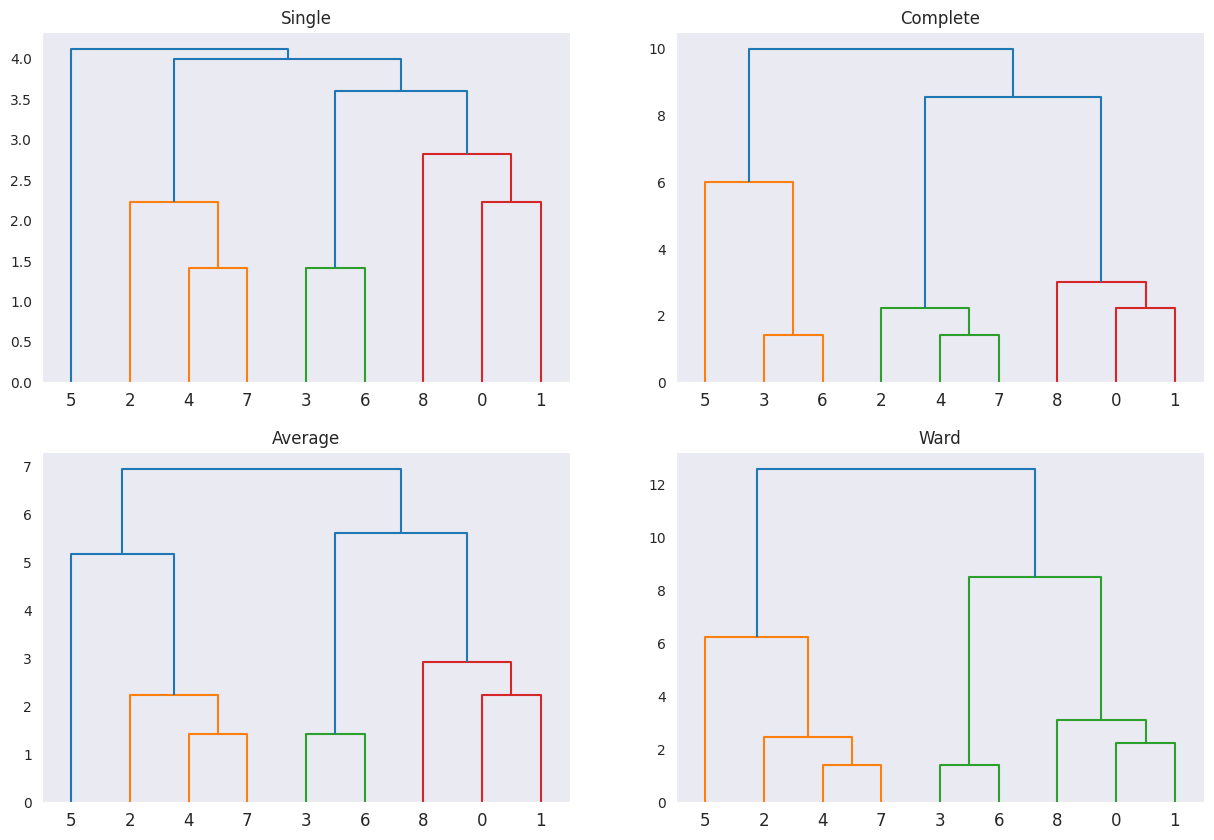

In [7]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

use the fcluster function to find the clusters for the Ward linkage

In [8]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(Z4, 2, criterion='maxclust')

print(f"Clusters: {f1}")

Clusters: [2 2 1 2 1 1 2 1 2]


use the fcluster function to find the clusters for the Single linkage

In [9]:
f1 = fcluster(Z1, 2, criterion='maxclust')

print(f"Clusters: {f1}")

Clusters: [1 1 1 1 1 2 1 1 1]


use the fcluster function to find the clusters for the Complete linkage

In [10]:
f1 = fcluster(Z2, 2, criterion='maxclust')

print(f"Clusters: {f1}")

Clusters: [2 2 2 1 2 1 1 2 2]


use the fcluster function to find the clusters for the Average linkage

In [13]:
f1 = fcluster(Z3, 2, criterion='maxclust')

print(f"Clusters: {f1}")

Clusters: [2 2 1 2 1 1 2 1 2]


# Hierarchical Clustering using Scikit-Learn


In [14]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X1)

print(Z1.labels_)

[0 0 1 0 1 1 0 1 0]


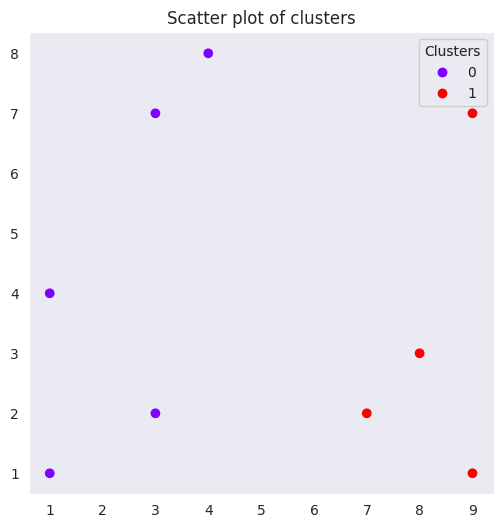

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X1[:,0], X1[:,1], c=Z1.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

In [18]:
Z2 = AgglomerativeClustering(n_clusters=2, linkage='single')

Z2.fit_predict(X1)

print(Z2.labels_)

[0 0 0 0 0 1 0 0 0]


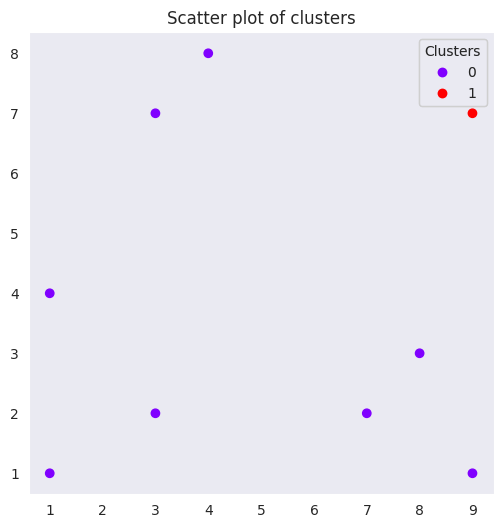

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X1[:,0], X1[:,1], c=Z2.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

In [20]:
Z3 = AgglomerativeClustering(n_clusters=2, linkage='complete')

Z3.fit_predict(X1)

print(Z3.labels_)

[0 0 0 1 0 1 1 0 0]


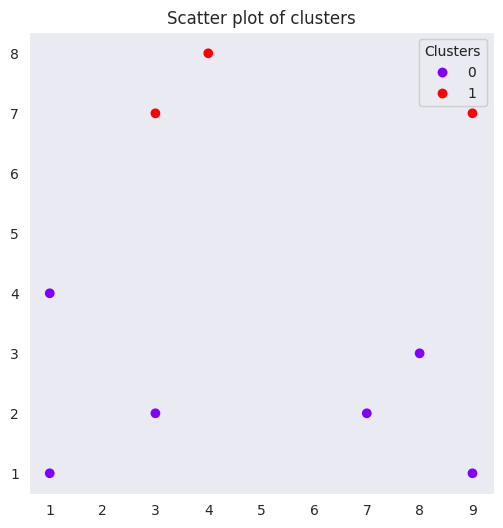

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X1[:,0], X1[:,1], c=Z3.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

In [22]:
Z4 = AgglomerativeClustering(n_clusters=2, linkage='average')

Z4.fit_predict(X1)

print(Z4.labels_)

[0 0 1 0 1 1 0 1 0]


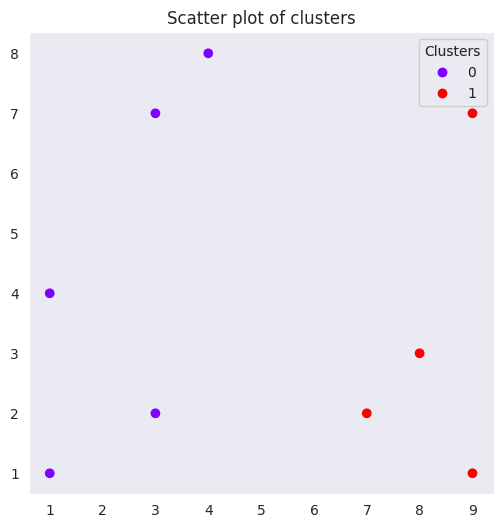

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X1[:,0], X1[:,1], c=Z4.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()